In [330]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from lightning.classification import FistaClassifier

%matplotlib inline 

In [331]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [332]:
df['Albumin_and_Globulin_Ratio'].fillna(value=0.947538, inplace=True)
from sklearn. preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,2:-1] = sc.fit_transform(df.iloc[:,2:-1])

#df.describe()

In [333]:
df.info()
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null float64
Alamine_Aminotransferase      583 non-null float64
Aspartate_Aminotransferase    583 non-null float64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 50.2+ KB


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147908,1
1,62,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650707,1
2,62,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179333,1
3,58,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166341,1
4,72,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719155,1


Dataset
1    416
2    167
dtype: int64


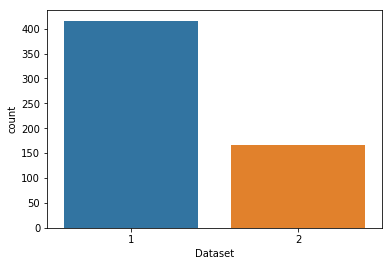

In [334]:
print(df.groupby('Dataset').size())
sns.countplot(df['Dataset'],label="Count")
plt.show()

In [335]:
test_per = int(len(df.index)*0.9) #actual is 0.1-0.9
print("test size:", int(len(df.index)- test_per))
testdf = df[test_per:]
df = df[:test_per]
df.shape
print(df.groupby('Dataset').size())

test size: 59
Dataset
1    372
2    152
dtype: int64


In [336]:
def add_labelnoise(noise_level, seed=None):
    np.random.seed(seed) 
   # train_p = int(noise_level * len(traindf.index))
   # validate_p = int(noise_level * len(valdf.index)) 
   # x = np.random.randint(low = 0, high = len(traindf)-train_p)
  #  y = np.random.randint(low = 0, high = len(valdf)-validate_p)
   # print(y)
    l = int(noise_level*len(df.index))
    for i in range(l):
        if df['Dataset'][i]==1:
            df['Dataset'][i]=2
        elif df['Dataset'][i]==2:
            df['Dataset'][i]=1
      
        
    #return traindf, valdf

#t.head(20)
#t['Outcome'][:10]

add_labelnoise(0.30)
df.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147908,2
1,62,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650707,2
2,62,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179333,2
3,58,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166341,2
4,72,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719155,2


In [337]:
print(df.groupby('Dataset').size())

Dataset
1    303
2    221
dtype: int64


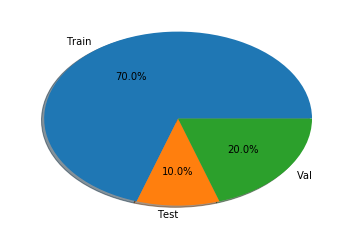

Train set (419, 11)
Test set (59, 11)
Validation set (105, 11)
Dataset
1    241
2    178
dtype: int64


In [369]:
#split our data into train and test
#traindf, testdf = train_test_split(df, test_size = 0.3)
#traindf, valdf, testdf = train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None)
traindf, valdf = train_test_split(df, test_size = 0.2)
labels = 'Train', 'Test', 'Val'
plt.pie([70, 10, 20], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)
print("Validation set", valdf.shape)

print(traindf.groupby('Dataset').size())

In [370]:
train_X=traindf[traindf.columns[:-1]]
val_X=valdf[testdf.columns[:-1]]
train_Y=traindf['Dataset']
val_Y=valdf['Dataset']
test_X=testdf[testdf.columns[:-1]]
test_Y=testdf['Dataset']

In [379]:
X = train_X
y = train_Y
clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.7457627118644068
Cross_val score : 0.5115584415584415


In [380]:
clf = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.711864406779661
Cross_val score : 0.5633766233766233


In [384]:
clf = SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.711864406779661
Cross_val score : 0.5220779220779221


In [386]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.7457627118644068
Cross_val score : 0.5142857142857142


In [388]:
clf = SGDClassifier(loss='modified_huber', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.7457627118644068
Cross_val score : 0.5542857142857143


## FISTA

In [ ]:


# Set classifier options.
clf = FistaClassifier(C=1.0, alpha=1.0, loss='squared_hinge', penalty='l1',
                      multiclass=True, max_iter=1000, max_steps=30, eta=2.0,
                      sigma=1e-05, callback=None, verbose=0  )

# Train the model.
clf.fit(X, y)


# Accuracy
print("Accuracy :", clf.score(test_X, test_Y))

# Percentage of selected features
print(clf.n_nonzero(percentage=True))

scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())
